In [22]:
from google.colab import files
file = files.upload()

Saving Project 4 Shares prediction-20201204T074439Z-001 (1).zip to Project 4 Shares prediction-20201204T074439Z-001 (1) (1).zip


In [23]:
!unzip 'Project 4 Shares prediction-20201204T074439Z-001 (1).zip'

Archive:  Project 4 Shares prediction-20201204T074439Z-001 (1).zip
replace Project 4 Shares prediction/sample.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Project 4 Shares prediction/sample.csv  
  inflating: Project 4 Shares prediction/dev.csv  
  inflating: Project 4 Shares prediction/train.csv  
  inflating: Project 4 Shares prediction/test.csv  


In [24]:
# import required modules and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
data = pd.read_csv('Project 4 Shares prediction/train.csv')

In [260]:
df = data.copy()

# **EXPLORATORY DATA ANALYSIS**

In [261]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,427.0,13.0,116.0,0.782609,1.0,0.925373,6.0,4.0,0.0,0.0,4.698276,8.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,535.0,186.75,2700.0,843300.0,309862.500000,965.470899,4084.401028,2551.102028,1400.0,4900.0,3150.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.505427,0.276537,0.167537,0.025001,0.025498,0.381760,0.212413,0.060345,0.008621,0.875000,0.125000,0.436147,0.136364,0.8,-0.125000,-0.125000,-0.125000,0.375,-0.125,0.125,0.125,6077.0
1,178.0,6.0,232.0,0.620690,1.0,0.804687,8.0,6.0,1.0,0.0,4.396552,5.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,748.0,185.80,4300.0,843300.0,329800.000000,1949.600000,3530.889450,2787.753879,1000.0,11200.0,4025.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.409990,0.040010,0.040007,0.040001,0.469991,0.477700,0.149441,0.043103,0.012931,0.769231,0.230769,0.338994,0.136364,0.6,-0.166667,-0.200000,-0.100000,0.000,0.000,0.500,0.000,6186.0
2,604.0,9.0,219.0,0.648402,1.0,0.818966,4.0,1.0,0.0,1.0,4.616438,6.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,849.0,369.00,8400.0,690400.0,191183.333333,2932.050916,4175.526316,3365.371718,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033334,0.033337,0.033375,0.033334,0.866620,0.554271,0.132674,0.050228,0.027397,0.647059,0.352941,0.457792,0.100000,1.0,-0.269811,-0.666667,-0.071429,0.125,0.000,0.375,0.000,4987.0
3,452.0,14.0,126.0,0.698413,1.0,0.849315,5.0,4.0,0.0,1.0,3.976190,9.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,594.0,187.50,0.0,843300.0,386777.777778,0.000000,6228.399334,3355.251379,6300.0,6300.0,6300.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.022223,0.022406,0.022223,0.910926,0.022223,0.475000,-0.122159,0.015873,0.015873,0.500000,0.500000,0.218182,0.136364,0.3,-0.400000,-0.500000,-0.300000,0.400,0.100,0.100,0.100,6470.0
4,357.0,12.0,383.0,0.518617,1.0,0.671296,9.0,4.0,1.0,0.0,4.731070,6.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,393.0,192.50,2200.0,843300.0,267866.666667,995.000000,3575.342268,2193.888718,1000.0,1100.0,1050.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.034359,0.199985,0.698987,0.033334,0.033335,0.375904,0.091226,0.018277,0.020888,0.466667,0.533333,0.369898,0.214286,0.5,-0.180903,-0.400000,-0.100000,0.450,0.350,0.050,0.350,5865.0


In [262]:
df.tail()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
23781,540.0,9.0,318.0,0.538217,1.0,0.641414,5.0,3.0,5.0,1.0,4.176101,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,550.0,215.600000,18000.0,843300.0,513540.000000,2222.548387,5291.091279,3733.909393,1100.0,7500.0,4300.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.040022,0.040000,0.839978,0.040000,0.401920,0.190953,0.047170,0.012579,0.789474,0.210526,0.423853,0.05,0.85,-0.302778,-0.5,-0.155556,0.0,0.0,0.5,0.0,7078.0
23782,646.0,11.0,204.0,0.593137,1.0,0.692913,11.0,3.0,7.0,1.0,4.602941,7.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,808.0,332.000000,4700.0,617900.0,367228.571429,1916.428571,6288.137255,4135.673596,3400.0,3700.0,3550.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028572,0.318917,0.028571,0.595368,0.028571,0.665734,0.202797,0.049020,0.009804,0.833333,0.166667,0.363636,0.10,0.80,-0.500000,-0.5,-0.500000,1.0,0.6,0.5,0.6,5557.0
23783,499.0,8.0,664.0,0.499190,1.0,0.649215,21.0,3.0,16.0,0.0,4.240964,7.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,676.0,332.714286,618.0,843300.0,184459.714286,618.000000,3254.777732,2315.172812,759.0,759.0,759.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028572,0.123557,0.028572,0.028572,0.790727,0.563742,0.311402,0.060241,0.013554,0.816327,0.183673,0.448141,0.10,1.00,-0.197840,-0.4,-0.125000,0.0,0.0,0.5,0.0,5479.0
23784,542.0,12.0,413.0,0.619048,1.0,0.781250,21.0,0.0,1.0,0.0,4.774818,7.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1200.0,475.714286,1500.0,843300.0,230528.571429,1300.000000,4535.380180,2722.250978,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.257840,0.028577,0.339902,0.344759,0.028922,0.407444,0.131928,0.033898,0.012107,0.736842,0.263158,0.252219,0.10,0.50,-0.336667,-0.5,-0.200000,0.0,0.0,0.5,0.0,5694.0
23785,434.0,9.0,979.0,0.401639,1.0,0.585551,13.0,0.0,1.0,0.0,4.705822,9.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,7900.0,1269.000000,3700.0,843300.0,212444.444444,2316.444444,7900.000000,3755.899699,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.911064,0.022223,0.022223,0.022237,0.022253,0.553558,0.113615,0.040858,0.014300,0.740741,0.259259,0.426209,0.10,1.00,-0.460714,-1.0,-0.100000,0.0,0.0,0.5,0.0,5682.0


In [263]:
df.shape

(23786, 60)

In [264]:
df.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23786 entries, 0 to 23785
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      23786 non-null  float64
 1    n_tokens_title                 23786 non-null  float64
 2    n_tokens_content               23786 non-null  float64
 3    n_unique_tokens                23786 non-null  float64
 4    n_non_stop_words               23786 non-null  float64
 5    n_non_stop_unique_tokens       23786 non-null  float64
 6    num_hrefs                      23786 non-null  float64
 7    num_self_hrefs                 23786 non-null  float64
 8    num_imgs                       23786 non-null  float64
 9    num_videos                     23786 non-null  float64
 10   average_token_length           23786 non-null  float64
 11   num_keywords                   23786 non-null  float64
 12   data_channel_is_lifestyle      

In [266]:
df.isna().sum()

 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares  

In [267]:
min(df[' shares']) , max(df[' shares'])

(1508.0, 18051.0)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


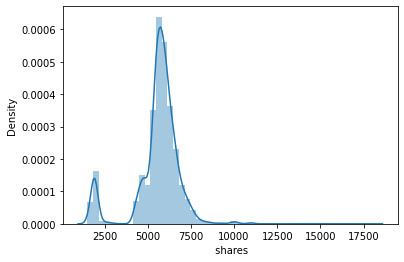

In [268]:
sns.distplot(df[' shares'])

# **DATA CORRELATION**

In [270]:
df.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.237175,-0.057134,-0.000431,-0.002482,0.000382,-0.002307,0.066487,-0.035176,0.001287,0.130282,0.051802,0.055192,-0.050106,0.052097,0.080555,0.077662,-0.166197,0.592194,0.026443,0.129359,-0.084302,-0.639980,-0.501465,-0.160451,-0.052952,-0.167627,-0.014751,-0.019075,-0.019189,-0.002610,-0.008682,0.010131,0.002880,-0.002625,0.002146,-0.001193,0.000644,0.080883,0.004389,-0.143218,-0.029105,0.092649,0.129777,0.156104,0.213192,0.013748,0.199010,-0.071445,0.124471,0.050869,0.104380,-0.002593,0.058989,-0.061029,-0.018275,0.030552,0.014294,-0.010278,-0.617016
n_tokens_title,-0.237175,1.000000,0.015615,-0.005916,-0.005484,-0.006016,-0.048707,-0.014440,-0.012776,0.054967,-0.069779,-0.006449,-0.069707,0.128640,-0.022337,-0.090962,-0.037323,0.047478,-0.107608,-0.002930,-0.028286,0.011965,0.119778,0.115640,-0.006615,0.007963,0.003388,-0.008737,-0.000396,-0.002319,0.004727,0.010680,0.010283,-0.014811,-0.000783,-0.024696,0.007970,-0.011730,-0.067327,0.054938,0.038188,0.041678,-0.059953,-0.054236,-0.066601,-0.060014,0.008273,-0.061186,0.026443,-0.053630,-0.029440,-0.026191,-0.016113,-0.027449,0.009131,0.075504,0.001334,-0.146954,0.036315,0.122691
n_tokens_content,-0.057134,0.015615,1.000000,0.002504,0.019650,0.006546,0.425024,0.313226,0.339034,0.108519,0.170870,0.079196,0.030268,0.052528,0.001230,0.035315,0.026209,0.055361,-0.050945,0.002784,0.000768,-0.023837,0.056564,-0.091929,-0.027239,-0.028544,-0.080366,-0.027375,0.029070,-0.009645,0.001715,0.001403,-0.021390,-0.008052,-0.016202,0.026929,0.037227,0.047200,0.031590,-0.011873,0.087349,-0.147989,0.045877,0.133626,0.026629,0.141090,0.122856,0.105636,0.095501,0.135744,-0.258753,0.419722,-0.132583,-0.450057,0.223737,0.002916,0.024263,0.011967,0.015712,-0.013443
n_unique_tokens,-0.000431,-0.005916,0.002504,1.000000,0.999747,0.999911,-0.003333,0.009138,0.030144,-0.001238,0.020978,-0.003390,-0.001882,0.014317,-0.001488,-0.001402,-0.003062,-0.005561,0.000157,-0.000552,-0.001253,0.000808,-0.000178,0.001944,0.006751,-0.002465,-0.002002,0.000255,-0.000877,0.001406,-0.002909,0.013430,-0.002695,-0.003086,-0.002074,-0.002616,-0.002214,-0.003534,-0.003638,-0.002362,-0.007298,-0.004691,-0.005368,-0.010137,-0.002982,-0.005984,-0.004434,-0.009930,-0.005819,-0.009138,0.003507,-0.014837,0.006393,0.012171,-0.002575,-0.005927,-0.002827,-0.011826,-0.005321,0.001069
n_non_stop_words,-0.002482,-0.005484,0.019650,0.999747,1.000000,0.999724,0.004412,0.014502,0.037351,-0.001464,0.024941,-0.001543,-0.000906,0.014016,-0.001170,-0.000675,-0.001151,-0.003430,-0.001327,-0.000633,-0.001337,-0.000053,0.001397,-0.000816,0.005590,-0.003410,-0.004593,-0.000148,-0.000499,0.001234,-0.002875,0.013551,-0.003096,-0.003069,-0.002586,-0.001870,-0.001864,-0.002737,-0.002652,-0.004000,-0.004557,-0.009447,-0.002842,-0.007825,-0.002530,-0.004675,-0.003166,-0.007366,-0.003797,-0.006924,-0.002708,-0.006265,0.004188,0.003706,0.002336,-0.006443,-0.002209,-0.011226,-0.005325,0.000585
n_n

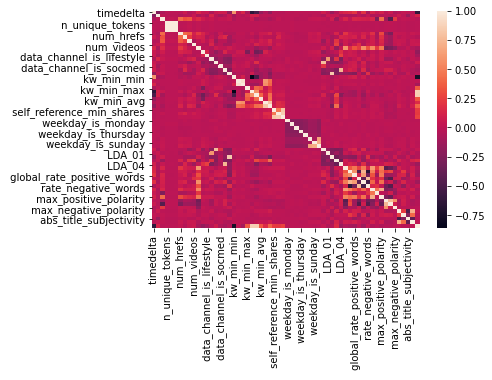

In [271]:
sns.heatmap(df.corr())

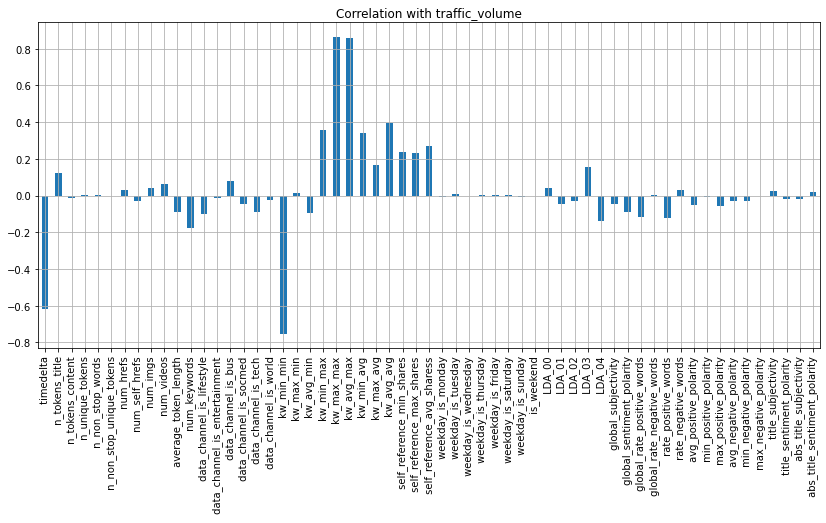

In [272]:
# lets plot correlation plot in another form as heatmap is not clear to conclude feature importance

plt.figure(figsize=(14,6))
df.drop(' shares', axis=1).corrwith(df[' shares']).plot(kind = 'bar', grid = True,title = "Correlation with traffic_volume")

In [390]:
pip install catboost

     |████████████████████████████████| 66.3MB 63kB/s 


# TRAINING AND TESTING THE DATA USING ML MODELS

In [448]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [274]:
X=df.drop([' shares'],axis=1)
X.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,427.0,13.0,116.0,0.782609,1.0,0.925373,6.0,4.0,0.0,0.0,4.698276,8.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,535.0,186.75,2700.0,843300.0,309862.500000,965.470899,4084.401028,2551.102028,1400.0,4900.0,3150.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.505427,0.276537,0.167537,0.025001,0.025498,0.381760,0.212413,0.060345,0.008621,0.875000,0.125000,0.436147,0.136364,0.8,-0.125000,-0.125000,-0.125000,0.375,-0.125,0.125,0.125
1,178.0,6.0,232.0,0.620690,1.0,0.804687,8.0,6.0,1.0,0.0,4.396552,5.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,748.0,185.80,4300.0,843300.0,329800.000000,1949.600000,3530.889450,2787.753879,1000.0,11200.0,4025.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.409990,0.040010,0.040007,0.040001,0.469991,0.477700,0.149441,0.043103,0.012931,0.769231,0.230769,0.338994,0.136364,0.6,-0.166667,-0.200000,-0.100000,0.000,0.000,0.500,0.000
2,604.0,9.0,219.0,0.648402,1.0,0.818966,4.0,1.0,0.0,1.0,4.616438,6.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,849.0,369.00,8400.0,690400.0,191183.333333,2932.050916,4175.526316,3365.371718,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033334,0.033337,0.033375,0.033334,0.866620,0.554271,0.132674,0.050228,0.027397,0.647059,0.352941,0.457792,0.100000,1.0,-0.269811,-0.666667,-0.071429,0.125,0.000,0.375,0.000
3,452.0,14.0,126.0,0.698413,1.0,0.849315,5.0,4.0,0.0,1.0,3.976190,9.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,594.0,187.50,0.0,843300.0,386777.777778,0.000000,6228.399334,3355.251379,6300.0,6300.0,6300.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.022223,0.022406,0.022223,0.910926,0.022223,0.475000,-0.122159,0.015873,0.015873,0.500000,0.500000,0.218182,0.136364,0.3,-0.400000,-0.500000,-0.300000,0.400,0.100,0.100,0.100
4,357.0,12.0,383.0,0.518617,1.0,0.671296,9.0,4.0,1.0,0.0,4.731070,6.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,393.0,192.50,2200.0,843300.0,267866.666667,995.000000,3575.342268,2193.888718,1000.0,1100.0,1050.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.034359,0.199985,0.698987,0.033334,0.033335,0.375904,0.091226,0.018277,0.020888,0.466667,0.533333,0.369898,0.214286,0.5,-0.180903,-0.400000,-0.100000,0.450,0.350,0.050,0.350


In [275]:
y=df[' shares']
y.head()

0    6077.0
1    6186.0
2    4987.0
3    6470.0
4    5865.0
Name:  shares, dtype: float64

In [436]:
x_train, x_test , y_train , y_test = train_test_split(X,y,random_state=40)

In [437]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() 
  
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test) 

In [438]:
from sklearn.decomposition import PCA 
  
pca = PCA() 
  
x_train = pca.fit_transform(x_train) 
x_test = pca.transform(x_test) 

In [439]:
# LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
pred=model.predict(x_test)
mean_squared_error(y_test,pred,squared=False)

0.29060987188622633

In [440]:
# KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(x_train, y_train)
pred=model.predict(x_test)
mean_squared_error(y_test,pred,squared=False)

410.92312871116127

In [441]:
# model = RandomForestRegressor()

model = RandomForestRegressor()
model.fit(x_train, y_train)
pred=model.predict(x_test)
mean_squared_error(y_test,pred,squared=False)

290.1824273038269

In [442]:
# GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)
pred=model.predict(x_test)
mean_squared_error(y_test,pred,squared=False)

288.57133368244587

In [443]:
# CatBoostRegressor

model = CatBoostRegressor()
model.fit(x_train, y_train)
pred=model.predict(x_test)
mean_squared_error(y_test,pred,squared=False)

Learning rate set to 0.065185
0:	learn: 1283.3828916	total: 28.3ms	remaining: 28.3s
1:	learn: 1222.2379436	total: 52.1ms	remaining: 26s
2:	learn: 1167.0485243	total: 75.3ms	remaining: 25s
3:	learn: 1115.1504191	total: 99.7ms	remaining: 24.8s
4:	learn: 1065.6162753	total: 124ms	remaining: 24.6s
5:	learn: 1019.1476694	total: 148ms	remaining: 24.5s
6:	learn: 976.3879438	total: 181ms	remaining: 25.7s
7:	learn: 937.0551381	total: 210ms	remaining: 26s
8:	learn: 901.4103748	total: 234ms	remaining: 25.8s
9:	learn: 866.0663697	total: 258ms	remaining: 25.5s
10:	learn: 831.9295562	total: 282ms	remaining: 25.3s
11:	learn: 802.2975765	total: 305ms	remaining: 25.1s
12:	learn: 774.4711383	total: 328ms	remaining: 24.9s
13:	learn: 747.2349538	total: 352ms	remaining: 24.8s
14:	learn: 722.5755885	total: 375ms	remaining: 24.6s
15:	learn: 698.4456617	total: 399ms	remaining: 24.5s
16:	learn: 679.4465952	total: 425ms	remaining: 24.6s
17:	learn: 660.4393289	total: 449ms	remaining: 24.5s
18:	learn: 639.4082836

147.83689370664294

In [449]:
# SVR

model = SVR()
model.fit(x_train, y_train)
pred=model.predict(x_test)
mean_squared_error(y_test,pred,squared=False)

1197.3964398470107

# **We will choose LinearRegresion model as it is giving much better rmse as compared to other ML models**

# SHARES PREDICTION ON TEST DATA

In [401]:
test = pd.read_csv('Project 4 Shares prediction/test.csv')

In [402]:
df=test.copy()

In [403]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,217,9,1546,0.422544,1.0,0.644936,33,2,15,0,4.513583,10,1,0,0,0,0,0,-1,430.0,146.1,66900,843300,241880.0,3205.522088,6867.245283,4464.827827,2500.0,2500.0,2500.0,0,0,0,1,0,0,0,0,0.741473,0.020440,0.020006,0.021233,0.196848,0.468619,0.163626,0.046572,0.014230,0.765957,0.234043,0.373573,0.033333,1.000,-0.232955,-1.0,-0.100000,0.0,0.0,0.5,0.0
1,413,10,549,0.555140,1.0,0.745665,40,2,9,1,4.626594,10,1,0,0,0,0,0,4,1000.0,385.7,2800,843300,176100.0,1879.250000,5462.307692,3682.718793,780.0,10900.0,5840.0,0,0,0,1,0,0,0,0,0.738704,0.020012,0.020034,0.020211,0.201039,0.462121,0.051010,0.021858,0.016393,0.571429,0.428571,0.368056,0.100000,0.800,-0.325926,-0.7,-0.166667,0.1,0.0,0.4,0.0
2,673,7,646,0.459459,1.0,0.619792,33,3,11,0,4.758514,10,0,0,0,0,1,0,217,515.0,365.3,35800,617900,107810.0,2420.071960,4377.518519,3323.906276,2400.0,6300.0,4350.0,0,0,1,0,0,0,0,0,0.020496,0.020025,0.020024,0.020120,0.919336,0.551769,0.295485,0.072755,0.012384,0.854545,0.145455,0.455242,0.033333,0.800,-0.266915,-0.5,-0.071429,0.0,0.0,0.5,0.0
3,412,13,261,0.607692,1.0,0.778523,10,4,0,1,4.739464,8,0,0,0,0,1,0,4,2100.0,505.0,2100,843300,188837.5,1154.894737,3410.580019,2604.544935,5000.0,5400.0,5200.0,0,0,0,0,1,0,0,0,0.025012,0.025003,0.275469,0.025002,0.649514,0.422344,0.182692,0.026820,0.011494,0.700000,0.300000,0.385714,0.100000,0.500,-0.175000,-0.2,-0.125000,0.0,0.0,0.5,0.0
4,161,7,423,0.516667,1.0,0.660079,5,5,1,0,5.226950,8,0,0,0,0,0,1,-1,330.0,84.5,7700,843300,287250.0,1248.715789,3511.757232,2098.286440,330.0,1100.0,796.0,0,0,0,1,0,0,0,0,0.025000,0.025000,0.778490,0.025000,0.146510,0.455896,-0.017460,0.023641,0.014184,0.625000,0.375000,0.160000,0.050000,0.375,-0.311111,-0.5,-0.100000,0.0,0.0,0.5,0.0


In [404]:
df.shape

(11894, 59)

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      11894 non-null  int64  
 1   n_tokens_title                 11894 non-null  int64  
 2   n_tokens_content               11894 non-null  int64  
 3   n_unique_tokens                11894 non-null  float64
 4   n_non_stop_words               11894 non-null  float64
 5   n_non_stop_unique_tokens       11894 non-null  float64
 6   num_hrefs                      11894 non-null  int64  
 7   num_self_hrefs                 11894 non-null  int64  
 8   num_imgs                       11894 non-null  int64  
 9   num_videos                     11894 non-null  int64  
 10  average_token_length           11894 non-null  float64
 11  num_keywords                   11894 non-null  int64  
 12  data_channel_is_lifestyle      11894 non-null 

In [408]:
df.isna().sum()

timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_s

In [417]:
sc = StandardScaler() 
  
df = sc.fit_transform(df)  

In [418]:
pca = PCA() 
  
df = pca.fit_transform(df) 

In [421]:
predict=model.predict(df)

In [422]:
predict

array([7506.85575416, 6223.40398185, 5173.19265498, ..., 7193.83782545,
       2006.40075504, 4723.87722608])

In [424]:
min(predict) , max(predict)

(702.8625362678367, 12390.922292661031)

In [425]:
len(predict)

11894

In [426]:
# save and download csv file
from IPython.display import HTML
import base64

In [427]:
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [428]:
index=[i for i in range(11894)]
sub=pd.DataFrame({'instance_id':index, 'share':predict})

In [429]:
create_download_link(sub)